# Sampling Hypothetical Player Statistics Based on Minutes Played

In [531]:
import pandas as pd
import numpy as np

# Importing Data

In [451]:
team_df=pd.read_csv('NBA_Team_Data_1999-2020.csv',index_col=0)

In [452]:
mapping=pd.read_csv('mapping.csv',index_col=0)

In [530]:
mapping
player_df=pd.read_csv('NBA_Player_Data_1999-2020.csv',index_col=0)
player_df.head(5)

,PLAYER,YEAR,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS
0,Shaquille O'Neal,1999-00,C,79,40.0,29.7,12.1,21.1,57.4,0.0,...,10.5,21.9,16.4,8.8,57.4,57.8,31.1,94.28,21.4,6211
1,Allen Iverson,1999-00,SG,70,40.8,28.4,10.4,24.8,42.1,1.3,...,2.4,7.0,4.6,9.0,44.6,49.6,33.4,95.34,12.6,5679
2,Grant Hill,1999-00,SF,74,37.5,25.8,9.4,19.2,48.9,0.5,...,3.6,14.6,9.1,10.4,50.1,56.5,29.8,98.46,17.0,5697
3,Vince Carter,1999-00,G,82,38.1,25.7,9.6,20.7,46.5,1.2,...,4.7,10.7,7.6,7.3,49.3,54.3,29.5,95.22,14.7,6198
4,Karl Malone,1999-00,PF,82,35.9,25.5,9.2,18.0,50.9,0.0,...,6.4,22.3,14.5,9.9,51.0,58.2,31.6,92.30,19.9,5660


In [454]:
def add_mapping(df,mapping):
    return pd.merge(df ,mapping,on='TEAM')

In [455]:
player_df=add_mapping(player_df,mapping)

In [456]:
player_df

,PLAYER,YEAR,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS,TEAM NAME
0,Shaquille O'Neal,1999-00,C,79,40.0,29.7,12.1,21.1,57.4,0.0,...,21.9,16.4,8.8,57.4,57.8,31.1,94.28,21.4,6211,Los Angeles Lakers
1,Kobe Bryant,1999-00,SF,66,38.2,22.5,8.4,17.9,46.8,0.7,...,11.4,7.9,9.8,48.8,54.6,26.1,96.10,14.9,5047,Los Angeles Lakers
2,Glen Rice,1999-00,SF,80,31.6,15.9,5.3,12.3,43.0,1.1,...,10.0,6.2,7.9,47.2,55.1,21.6,95.65,11.1,5045,Los Angeles Lakers
3,Ron Harper,1999-00,G,80,25.5,7.0,2.7,6.6,39.9,0.4,...,11.3,7.9,13.2,43.0,46.8,15.6,93.99,8.6,4006,Los Angeles Lakers
4,Rick Fox,1999-00,SF,82,18.0,6.5,2.5,6.1,41.4,0.7,...,8.7,6.3,11.5,47.3,50.2,17.9,97.09,7.2,2984,Los Angeles Lakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8978,Frank Jackson,2019-20,PG,59,13.5,6.3,2.3,5.6,40.5,0.8,...,7.0,4.8,10.4,47.6,51.0,20.3,107.45,5.5,1785,New Orleans Pelicans
8979,Nickeil Alexander-Walker,2019-20,SG,47,12.6,5.7,2.1,5.7,36.8,1.0,...,12.2,6.8,12.7,45.5,47.3,23.3,104.60,6.9,1283,New Orleans Pelicans
8980,Kenrich Williams,2019-20,SF,39,21.3,3.5,1.3,3.8,34.7,0.6,...,15.7,10.4,9.3,43.2,42.9,8.7,103.37,5.2,1788,New Orleans Pelicans
8981,Zylan Cheatham,2019-20,SF,4,12.8,3.0,1.5,2.3,66.7,0.0,...,12.8,9.5,25.0,66.7,66.7,10.3,105.79,3.4,112,New Orleans Pelicans


# Getting NBA Rosters

In [7]:
# function to get roster

def getRoster(player_df,team,year):
    return player_df[(player_df['TEAM NAME']==team) & (player_df['YEAR']==year)].sort_values('MIN',ascending=False)

In [8]:
# testing function

getRoster(player_df,'Miami Heat','2012-13')

,PLAYER,YEAR,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS,TEAM NAME
3483,LeBron James,2012-13,SF,76,37.9,26.8,10.1,17.8,56.5,1.4,...,18.0,11.5,9.6,60.3,64.0,29.4,92.28,22.1,5549,Miami Heat
3484,Dwyane Wade,2012-13,G,69,34.7,21.2,8.2,15.8,52.1,0.2,...,11.2,7.9,10.6,52.8,57.1,28.8,92.83,15.3,4625,Miami Heat
3485,Chris Bosh,2012-13,PF,74,33.2,16.6,6.6,12.3,53.5,0.3,...,15.3,11.3,9.9,54.6,59.2,22.5,91.91,12.9,4706,Miami Heat
3487,Mario Chalmers,2012-13,G,77,26.9,8.6,2.9,6.9,42.9,1.6,...,7.6,4.6,12.3,54.5,57.6,15.6,92.54,7.9,3996,Miami Heat
3486,Ray Allen,2012-13,SG,79,25.8,10.9,3.7,8.2,44.9,1.8,...,9.0,5.7,10.9,55.5,59.9,18.5,92.03,9.6,3914,Miami Heat
3488,Shane Battier,2012-13,SF,72,24.8,6.6,2.1,5.0,42.0,1.9,...,7.1,4.9,7.0,60.8,62.3,10.9,92.14,5.9,3431,Miami Heat
3489,Norris Cole,2012-13,F,80,19.9,5.6,2.2,5.3,42.1,0.4,...,7.1,4.4,14.2,46.2,48.3,16.8,91.75,4.9,3041,Miami Heat
3493,Udonis Haslem,2012-13,PF,75,18.9,3.9,1.7,3.3,51.4,0.0,...,22.9,16.0,12.7,51.4,53.5,10.5,92.63,7.4,2722,Miami Heat
3492,Mike Miller,2012-13,SG,59,15.3,4.8,1.7,3.9,43.3,1.2,...,15.3,9.3,9.5,59.1,59.6,14.1,92.49,10.4,1740,Miami Heat
3491,Chris Andersen,2012-13,PF,42,14.9,4.9,1.7,2.9,57.7,0.0,...,18.0,14.4,11.7,58.5,63.1,14.0,92.08,10.9,1203,Miami Heat


In [9]:
# getting all rosters with minimum 8 players

rosters=[]

for team in player_df['TEAM NAME'].unique():
    for year in player_df[player_df['TEAM NAME']==team]['YEAR'].unique():
        if (len(getRoster(player_df,team,year)))>=8:
            rosters.append(getRoster(player_df,team,year).head(8))
    
    

In [10]:
rosters[0]

,PLAYER,YEAR,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS,TEAM NAME
0,Shaquille O'Neal,1999-00,C,79,40.0,29.7,12.1,21.1,57.4,0.0,...,21.9,16.4,8.8,57.4,57.8,31.1,94.28,21.4,6211,Los Angeles Lakers
1,Kobe Bryant,1999-00,SF,66,38.2,22.5,8.4,17.9,46.8,0.7,...,11.4,7.9,9.8,48.8,54.6,26.1,96.10,14.9,5047,Los Angeles Lakers
2,Glen Rice,1999-00,SF,80,31.6,15.9,5.3,12.3,43.0,1.1,...,10.0,6.2,7.9,47.2,55.1,21.6,95.65,11.1,5045,Los Angeles Lakers
3,Ron Harper,1999-00,G,80,25.5,7.0,2.7,6.6,39.9,0.4,...,11.3,7.9,13.2,43.0,46.8,15.6,93.99,8.6,4006,Los Angeles Lakers
7,A.C. Green,1999-00,F,82,23.5,5.0,2.1,4.7,44.7,0.0,...,16.0,12.0,9.4,44.8,48.2,11.0,93.55,8.8,3769,Los Angeles Lakers
5,Derek Fisher,1999-00,PG,78,23.1,6.3,2.1,6.2,34.6,0.7,...,6.2,3.8,8.9,40.0,44.9,15.0,96.04,6.7,3610,Los Angeles Lakers
6,Robert Horry,1999-00,PF,76,22.2,5.7,2.1,4.8,43.8,0.4,...,12.4,10.2,12.1,47.8,52.8,12.4,97.10,9.8,3410,Los Angeles Lakers
4,Rick Fox,1999-00,SF,82,18.0,6.5,2.5,6.1,41.4,0.7,...,8.7,6.3,11.5,47.3,50.2,17.9,97.09,7.2,2984,Los Angeles Lakers


# Analyzing Minutes Played by NBA Rosters

In [66]:
minutes_wide={
    'player1':[],
    'player2':[],
    'player3':[],
    'player4':[],
    'player5':[],
    'player6':[],
    'player7':[],
    'player8':[]
}

minutes_long={
    'player':[],
    'index':[],
    'minutes':[],
    'team':[],
    'year':[],
    'pie':[],
    'total_mins':[]
    
}


team_mins=[]
team_score=[]



for team in rosters:
    for i in range(len(team)):
        minutes_wide['player{}'.format(i+1)].append((team.iloc[i]['MIN']))
        
        minutes_long['player'].append('player{}'.format(i+1))
        minutes_long['index'].append(i+1)
        minutes_long['year'].append(team.iloc[i]['YEAR'])
        
        minutes_long['minutes'].append((team.iloc[i]['MIN']))
        minutes_long['pie'].append((team.iloc[i]['PIE']))
        minutes_long['team'].append((team.iloc[i]['TEAM']+" "+team.iloc[i]['YEAR']))
        minutes_long['total_mins'].append(np.sum(team['MIN']))
    
    


    
    team_mins.append(np.sum(team['MIN']))
    team_score.append(np.sum(team['PTS']))
  
        
        


In [67]:
# wide format
min_dist=pd.DataFrame.from_dict(minutes_wide)
min_dist

,player1,player2,player3,player4,player5,player6,player7,player8
0,40.0,38.2,31.6,25.5,23.5,23.1,22.2,18.0
1,40.9,39.5,35.5,31.0,27.9,24.2,22.9,20.1
2,38.3,36.1,28.2,27.9,26.4,24.0,21.5,19.7
3,41.5,37.8,34.5,29.3,28.7,22.7,18.6,14.5
4,37.6,36.8,34.5,32.7,23.8,22.3,21.6,21.2
...,...,...,...,...,...,...,...,...
573,35.5,32.9,30.6,30.4,28.2,27.6,26.6,24.6
574,36.1,34.2,32.7,29.7,25.0,24.9,23.5,23.3
575,36.4,36.2,36.1,31.5,27.2,26.2,23.7,19.6
576,35.9,33.0,30.6,29.8,27.6,25.5,23.5,20.0


In [70]:
# long format

min_long=pd.DataFrame.from_dict(minutes_long)

,player,index,minutes,team,year,pie,total_mins
0,player1,1,40.0,LAL 1999-00,1999-00,21.4,222.1
1,player2,2,38.2,LAL 1999-00,1999-00,14.9,222.1
2,player3,3,31.6,LAL 1999-00,1999-00,11.1,222.1
3,player4,4,25.5,LAL 1999-00,1999-00,8.6,222.1
4,player5,5,23.5,LAL 1999-00,1999-00,8.8,222.1
...,...,...,...,...,...,...,...
4619,player4,4,27.8,NOP 2019-20,2019-20,14.1,227.6
4620,player5,5,27.0,NOP 2019-20,2019-20,9.1,227.6
4621,player6,6,26.4,NOP 2019-20,2019-20,9.8,227.6
4622,player7,7,24.4,NOP 2019-20,2019-20,12.9,227.6


In [479]:
# save minutes data 

min_long.drop(['team','year','pie'],axis=1).to_csv('minutes_played.csv')

In [204]:
# analyzing mean minutes played by player 1 to player 8

[np.mean(min_long[min_long['player']==i]['minutes']) for i in min_long['player'].unique()]

[36.595674740484455,
 34.399653979238764,
 31.93408304498267,
 29.616608996539757,
 27.221626297577856,
 24.622837370242213,
 22.17058823529412,
 19.97058823529412]

# Data Visualization for Minutes Played

In [28]:
import plotly.express as px

# histogram
fig = px.histogram(min_long, x="minutes",color='player')
fig.show()

In [30]:
# boxplot

fig = px.box(min_long, x="player", y="minutes",color='player')
fig.show()

In [35]:
player_df.drop(['PLAYER','YEAR','TEAM NAME','TEAM'],axis=1).dtypes

POS           object
GP             int64
MIN          float64
PTS          float64
FGM          float64
FGA          float64
FG%          float64
3PM          float64
3PA          float64
3P%          float64
FTM          float64
FTA          float64
FT%          float64
REB          float64
AST          float64
STL          float64
BLK          float64
TO           float64
DD2            int64
TD3            int64
PER          float64
AGE            int64
W              int64
L              int64
OFFRTG       float64
DEFRTG       float64
NETRTG       float64
AST%         float64
AST/TO       float64
AST RATIO    float64
OREB%        float64
DREB%        float64
REB%         float64
TO RATIO     float64
EFG%         float64
TS%          float64
USG%         float64
PACE         float64
PIE          float64
POSS           int64
dtype: object

# Metrics that Correlate with Minutes Played

<AxesSubplot:>

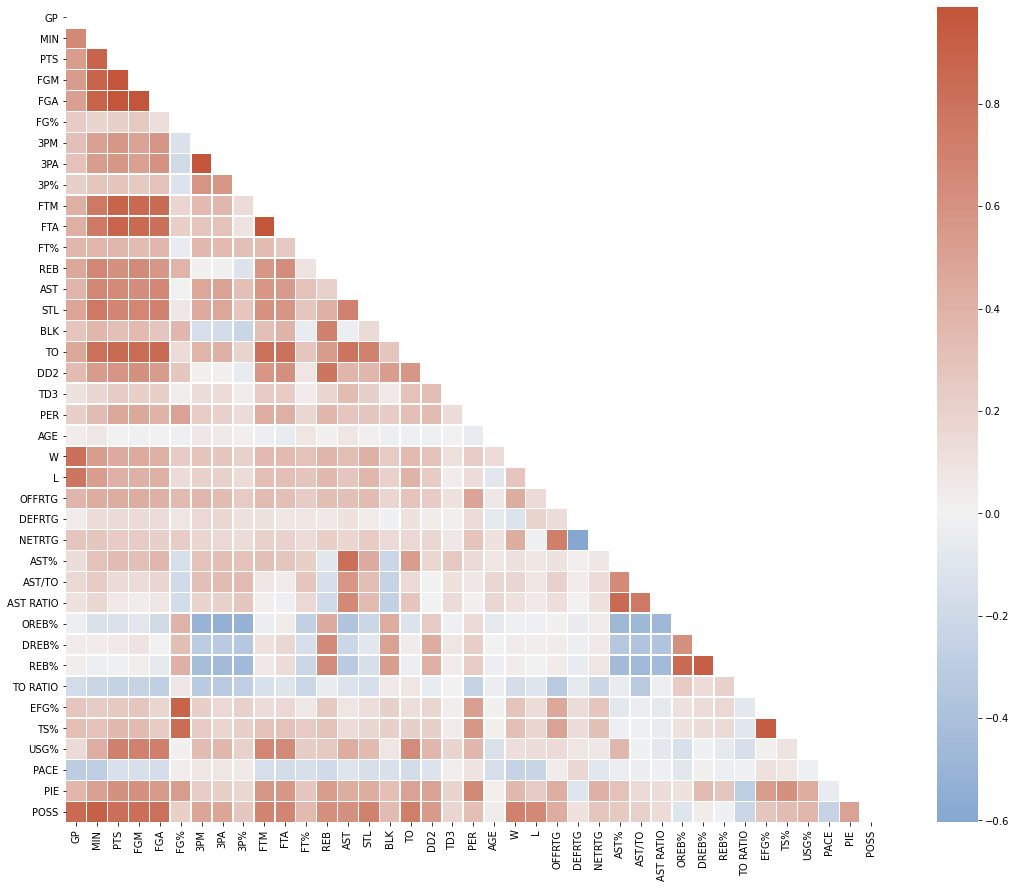

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap with annotations on and the colorbar off

corr= player_df.drop(['PLAYER','YEAR','TEAM NAME','TEAM'],axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0,
            square=True, linewidths=.5)

# Kernel Density Estimator for Distribution of Minutes Played

In [101]:
from sklearn.neighbors import KernelDensity

In [534]:
from sklearn.neighbors import KernelDensity

minutes=[]

for i in min_long['team'].unique():
    team=min_long[min_long['team']==i]
    minutes.append(list(team['minutes']))


In [535]:
X=np.array(minutes)

In [487]:
# Training kernel density estimator
kde = KernelDensity(kernel='gaussian', bandwidth=1.12883).fit(X)


In [499]:
import pickle

In [516]:
# Saving KDE
pickle.dump(kde, open( "kde.pkl", "wb" ))
test=pickle.loads(pickle.dumps(kde))

In [522]:
# testing KDE minutes sampling
test.sample(1)

array([[42.3900179 , 35.23290768, 35.92893654, 34.45748515, 28.3059583 ,
        25.03925405, 24.88821285, 19.17962854]])

# Adjusting Player Stats to Minutes Played

In [425]:
metrics=['POS', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'STL',
       'BLK', 'TO', 'DD2', 'TD3', 'PER', 'AGE', 'OFFRTG', 'DEFRTG', 'NETRTG',
       'AST%', 'AST/TO', 'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO',
       'EFG%', 'TS%', 'USG%', 'PACE', 'PIE', 'POSS']


def adjust_to_minutes(minutes:float, player_stats:pd.DataFrame):
    adjusted_player_stat=[]
    
    for i in metrics:
        if i=='POS':

            adjusted_player_stat.append(max(set(list(player_stats[i])), key=list(player_stats[i]).count))
        elif i=='MIN':
            adjusted_player_stat.append(minutes)
            
        
        elif (i in corr[(corr['MIN']>0.5) & (corr['MIN']!=1)][['MIN']].index):
            adjusted_player_stat.append(np.mean((player_stats[i])/np.mean(player_stats['MIN']))*minutes)
                                         
        else:
            adjusted_player_stat.append(np.mean((player_stats[i])))
        
    return adjusted_player_stat
                            
            

def player_stats_sampling(player: str, minutes: float,stats_selection_method:str = 'prime' , prime_window=None):
    
    if player not in player_df['PLAYER'].unique():
        raise Exception("Invalid player: '{}' - Please select from player list shown at .view_available_players()".format(player))
    
    player_stats=player_df[player_df['PLAYER']==player]
    
    if stats_selection_method=='best':
        return [player]+adjust_to_minutes(minutes,player_stats.sort_values('PIE',ascending=False).head(1)[metrics])
    
    elif stats_selection_method=='prime':
        if prime_window==None:
            years=5
        else:
            years=prime_window
        
        return [player]+adjust_to_minutes(minutes,player_stats.sort_values('PIE',ascending=False).head(years)[metrics])
    
    else:
        return [player]+adjust_to_minutes(minutes,player_stats[metrics])
    
        


def team_stats_sampling(team:list, minutes_selection_method:str ='sample', stats_selection_method:str = 'prime' , prime_window=None):
    
    if len(team)==8:
        raise Exception("Team must contain 8 players, contains '{}' players".format(minutes_selection_method))
    
    if minutes_selection_method not in ['sample','average']:
        raise Exception("Invalid minutes_selection_method: '{}' - Please select from ['sample','average']".format(minutes_selection_method))
        
    if stats_selection_method not in ['prime','average','best']:
         raise Exception("stats_selection_method: '{}' - Please select from ['prime','average','best']".format(stats_selection_method))
            
    if stats_selection_method!='prime':
        if prime_window!=None:
            raise Exception("prime_window requires stats_selection_method='prime'".format(stats_selection_method))
    
    
    if minutes_selection_method=='sample':
        minutes=kde.sample(1)[0]
    else:
        minutes=[np.mean(min_long[min_long['player']==i]['minutes']) for i in min_long['player'].unique()]
    
    
    team_stats=[]
    
    for player,minute in zip(team,minutes):

        team_stats.append(player_stats_sampling(player,minutes=minute,stats_selection_method=stats_selection_method,prime_window=prime_window))
        
    
    return team_stats
    
    
    

In [540]:
kde.sample(1)[0][0]

41.87754547862006

# Code above was finnished, implemented & tested in Main.ipynb file